# Bitcoin-Ethereum-Price-Prediction

#### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

plt.rcParams["figure.figsize"] = (16,8)

In [2]:
import pandas_datareader
from pandas_datareader import data
import pandas_datareader.data as pdr
from datetime import datetime

#### setting start and end date

In [3]:
#setting the end date to today
end = datetime.today()

#Start date set to 2019-09-17
start = '2019-09-17'

#using yahoo finance to grab data
BTC_df = pdr.DataReader('BTC-INR','yahoo',start,end)



In [4]:
#Bitcoin
BTC_df.tail(5)

High         Low        Open       Close        Volume  \
Date                                                                       
2021-07-24  2632888.75  2522282.50  2552689.25  2631791.50  1.552763e+12   
2021-07-25  3014020.25  2627114.25  2634311.25  2773796.25  3.790421e+12   
2021-07-26  2935918.00  2708823.00  2769227.50  2935918.00  2.614844e+12   
2021-07-27  3036134.00  2895436.00  2943088.50  2975305.00  2.879081e+12   
2021-07-29  2985192.75  2931459.75  2967184.75  2975376.50  2.506094e+12   

             Adj Close  
Date                    
2021-07-24  2631791.50  
2021-07-25  2773796.25  
2021-07-26  2935918.00  
2021-07-27  2975305.00  
2021-07-29  2975376.50

#### Download daily to content folder

In [5]:
#BTC_df.to_csv('BTCdaily.csv')

#### Read in Daily data for Bitcoin , Ethereum

In [6]:
dt = pdr.get_data_yahoo(['BTC-INR','ETH-INR'],'2019-09-17', interval='m')
dt.tail(5)

Attributes  Adj Close                     Close                       High  \
Symbols       BTC-INR        ETH-INR    BTC-INR        ETH-INR     BTC-INR   
Date                                                                         
2021-03-31  4279028.5  205482.187500  4279028.5  205482.187500  4874119.00   
2021-04-30  2706163.5  196799.468750  2706163.5  196799.468750  4365943.00   
2021-05-31  2606038.0  169161.406250  2606038.0  169161.406250  3029429.25   
2021-06-30  2975305.0  170840.578125  2975305.0  170840.578125  3036134.00   
2021-07-29  2975376.5  171277.578125  2975376.5  171277.578125  2985192.75   

Attributes                        Low                       Open  \
Symbols           ETH-INR     BTC-INR        ETH-INR     BTC-INR   
Date                                                               
2021-03-31  207176.859375  3532815.75  140117.078125  4313645.00   
2021-04-30  320594.968750  2246731.00  126688.226562  4276397.00   
2021-05-31  210709.187500  2148089.50  126951.156250  2703332.00   
2021-06-30  180754.640625  2190553.75  128952.304688  2605676.75   
2021-07-29  171574.328125  2931459.75  169197.796875  2967184.75   

Attributes                          Volume                   
Symbols           ETH-INR          BTC-INR          ETH-INR  
Date                                                         
2021-03-31  140489.500000  137405482336858   74166325383506  
2021-04-30  205454.843750  144722773841806  110592417686186  
2021-05-31  196264.171875   87582547480392   59842981571315  
2021-06-30  169150.234375   54631200972399   40039556885311  
2021-07-29  170396.000000    2506094280704    1220605116416

### EDA

#### Descriptive Statistic using Pandas

In [7]:
BTC_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 677 entries, 2019-09-17 to 2021-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       677 non-null    float64
 1   Low        677 non-null    float64
 2   Open       677 non-null    float64
 3   Close      677 non-null    float64
 4   Volume     677 non-null    float64
 5   Adj Close  677 non-null    float64
dtypes: float64(6)
memory usage: 37.0 KB


In [8]:
#Bitcoin preprocessing
print(BTC_df.shape)
BTC_df.describe().transpose()

(677, 6)


count          mean           std           min           25%  \
High       677.0  1.580288e+06  1.288187e+06  3.973455e+05  6.597087e+05   
Low        677.0  1.487729e+06  1.198616e+06  3.099744e+05  6.276296e+05   
Open       677.0  1.536305e+06  1.247264e+06  3.717216e+05  6.438371e+05   
Close      677.0  1.539346e+06  1.247915e+06  3.700086e+05  6.434668e+05   
Volume     677.0  2.778263e+12  1.651449e+12  8.640972e+11  1.625281e+12   
Adj Close  677.0  1.539346e+06  1.247915e+06  3.700086e+05  6.434668e+05   

                    50%           75%           max  
High       8.021384e+05  2.605677e+06  4.874119e+06  
Low        7.843346e+05  2.402444e+06  4.671974e+06  
Open       7.930774e+05  2.503171e+06  4.775827e+06  
Close      7.940704e+05  2.505985e+06  4.774301e+06  
Volume     2.490918e+12  3.531934e+12  2.582998e+13  
Adj Close  7.940704e+05  2.505985e+06  4.774301e+06

In [9]:
#Checking for null values in Bitcoin Dataset
BTC_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

So we don't have to do any data cleaning

### Data Visualization

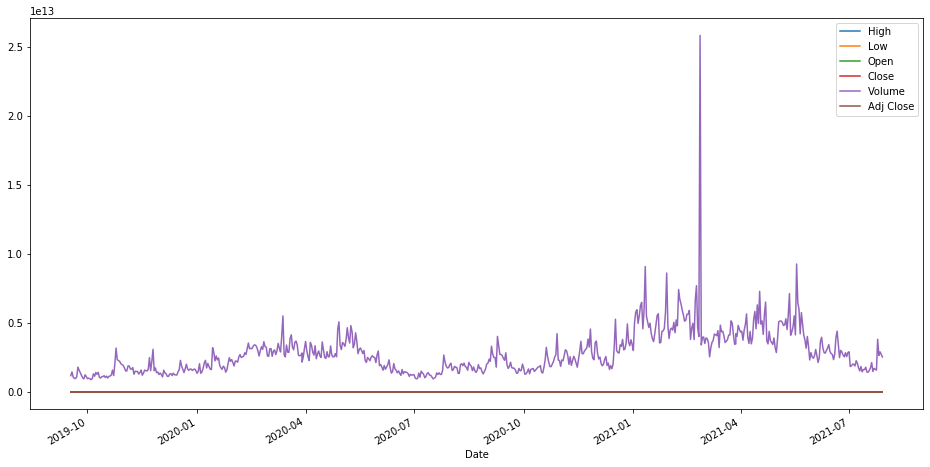

In [10]:
BTC_df.plot()

In [11]:
Ticker = ['BTH-INR','ETH-INR']

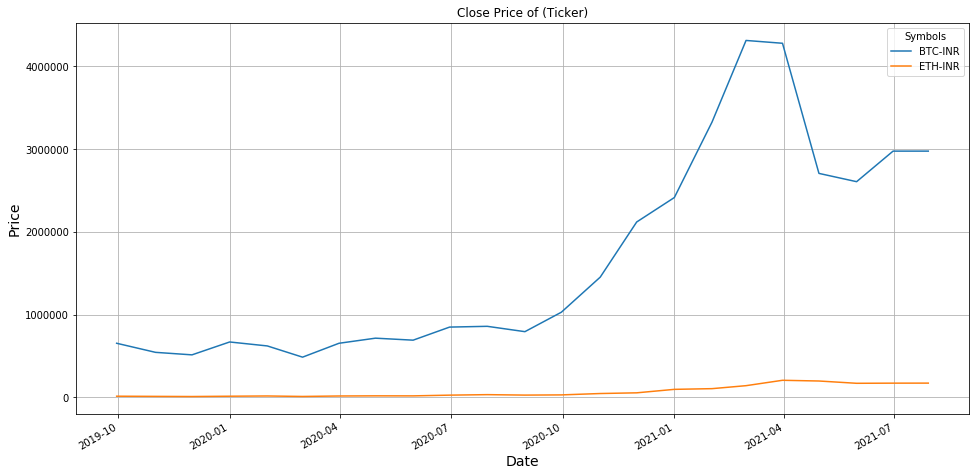

In [12]:
#close price plot
dt['Close'].plot()
plt.title(f'Close Price of (Ticker)')
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.grid(which='major')

#### Data Manipulation using Pandas

In [13]:
BTC_df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

From our output, we see that the date column wasn’t indexed.
We’ll reset the index, and we can have our Date as a column.


In [14]:
BTC_df.reset_index(inplace=True)
print(BTC_df.columns)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [15]:
BTC_df = BTC_df[['Date','Close']]

In [16]:
BTC_df.tail(5)

Date       Close
672 2021-07-24  2631791.50
673 2021-07-25  2773796.25
674 2021-07-26  2935918.00
675 2021-07-27  2975305.00
676 2021-07-29  2975376.50

### Modeling

#### Fb Prophet Model

The prophet library requires us to have only two columns in our data frame — “ds” and “y”, which is the Date and Close columns respectively.
So let’s grab the necessary columns and put it into a new data frame. Then we use the rename function to change the column names.

#### Bitcoin Closing Price prediction

In [17]:
df1 = BTC_df[["Date", "Close"]]
new_names = {
    "Date": "ds", 
    "Close": "y",
}
df1.rename(columns=new_names, inplace=True)

In [18]:
df1.tail(5)

ds           y
672 2021-07-24  2631791.50
673 2021-07-25  2773796.25
674 2021-07-26  2935918.00
675 2021-07-27  2975305.00
676 2021-07-29  2975376.50

In [19]:
# plot the Close price
import plotly.graph_objects as go

x = df1["ds"]
y = df1["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of Bitcoin Close Price",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

In [20]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation

In [21]:
BTC_m = Prophet(
    #seasonality_mode="multiplicative" 
    #weekly_seasonality=True
    )

BTC_m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
#df1['y'] = df1['y'] + 1
#df1['y'] = np.log(df1['y'])

In [23]:
future = BTC_m.make_future_dataframe(periods = 365)
future.tail()

ds
1035 2022-07-25
1036 2022-07-26
1037 2022-07-27
1038 2022-07-28
1039 2022-07-29

Model predictions:
Then, running the predictions is as easy as calling the predict function
Then we grab the essential columns we need.

In [24]:
forecast_BTC = BTC_m.predict(future)

forecast_BTC[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1035 2022-07-25 -2.989109e+06 -6.180777e+06  1.086124e+06
1036 2022-07-26 -3.004816e+06 -6.171822e+06  1.010080e+06
1037 2022-07-27 -3.018505e+06 -6.246360e+06  1.078363e+06
1038 2022-07-28 -3.034494e+06 -6.313931e+06  1.100750e+06
1039 2022-07-29 -3.052642e+06 -6.295853e+06  1.008844e+06

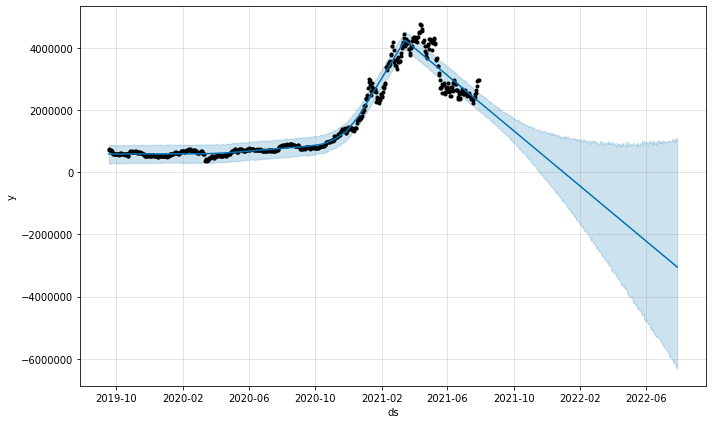

In [25]:
fig1 = BTC_m.plot(forecast_BTC)

Our forecasting model also includes growth curve trend, weekly seasonal, and yearly seasonal components which can be visualized like this.

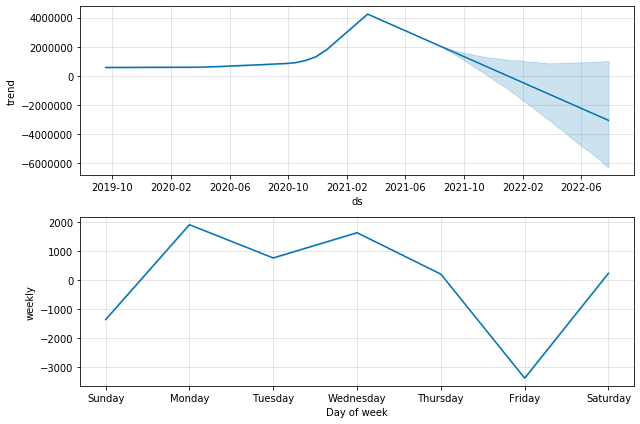

In [26]:
fig2 = BTC_m.plot_components(forecast_BTC)


In [27]:
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')
forecast_BTC[forecast_BTC['ds'] == next_day]['yhat'].item()

2247158.84331686

Let's get the price prediction for the next day

#### cross validation

In [43]:
BTC_cv = cross_validation(BTC_m, initial='310 days', period='180 days', horizon = '365 days')
BTC_cv.head(5)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-07-29 00:00:00 and 2020-07-29 00:00:00


ds           yhat     yhat_lower     yhat_upper            y  \
0 2020-07-30  758604.678696  668890.925653  842362.796829  848466.1875   
1 2020-07-31  761337.487613  676271.116257  848604.501900  881145.1250   
2 2020-08-01  758723.665388  666065.616892  841381.798343  828115.3125   
3 2020-08-02  759486.400842  666438.374075  852046.441282  845338.0625   
4 2020-08-03  760710.464051  661959.158180  857640.869670  841131.1250   

      cutoff  
0 2020-07-29  
1 2020-07-29  
2 2020-07-29  
3 2020-07-29  
4 2020-07-29

In [44]:
from fbprophet.diagnostics import performance_metrics
BTC_p = performance_metrics(BTC_cv)
BTC_p.head()

horizon           mse          rmse           mae      mape     mdape  \
0 36 days  7.622856e+09  87308.969219  82884.598480  0.095462  0.097237   
1 37 days  7.525013e+09  86746.834459  82262.725018  0.095037  0.096217   
2 38 days  7.214310e+09  84937.091667  80498.339034  0.093335  0.095598   
3 39 days  7.147003e+09  84539.951528  79929.402029  0.092791  0.095598   
4 40 days  7.056595e+09  84003.540238  79326.702486  0.092354  0.095412   

   coverage  
0  0.555556  
1  0.583333  
2  0.611111  
3  0.611111  
4  0.611111

C:\Users\Pratibha\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

C:\Users\Pratibha\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



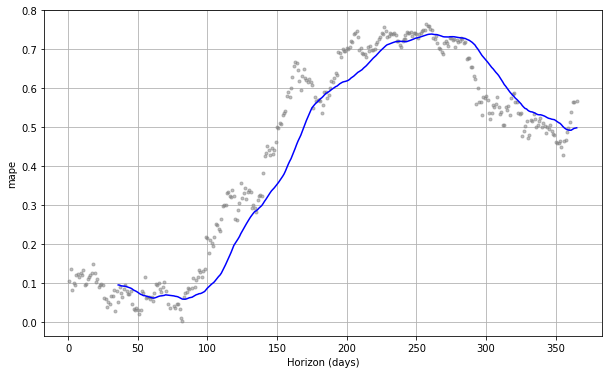

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(BTC_cv, metric='mape')

In [ ]:
df1 = BTC_df( "Date": "ds", 
    "Close": "y")
BTC_m = Prophet()
BTC_m.fit(df1)
future = BTC_m.make_future_dataframe(periods = 365)
forecast_BTC = BTC_m.predict(future)
fig1 = BTC_m.plot(forecast_BTC)
fig2 = BTC_m.plot_components(forecast_BTC)

#### Ethereum Closing Price prediction

In [46]:
ETH_df = pdr.DataReader('ETH-INR','yahoo',start,end)
ETH_df.tail(5)

High            Low           Open          Close  \
Date                                                                     
2021-07-24  163361.656250  156988.671875  162818.765625  163145.921875   
2021-07-25  180754.640625  162100.562500  163141.171875  165916.265625   
2021-07-26  172469.593750  160180.562500  165680.796875  171231.734375   
2021-07-27  174194.890625  167487.250000  171510.953125  170840.578125   
2021-07-29  172133.515625  169197.796875  170396.000000  172034.484375   

                  Volume      Adj Close  
Date                                     
2021-07-24  1.084462e+12  163145.921875  
2021-07-25  2.200041e+12  165916.265625  
2021-07-26  1.718586e+12  171231.734375  
2021-07-27  1.412768e+12  170840.578125  
2021-07-29  1.230215e+12  172034.484375

In [47]:
ETH_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 677 entries, 2019-09-17 to 2021-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       677 non-null    float64
 1   Low        677 non-null    float64
 2   Open       677 non-null    float64
 3   Close      677 non-null    float64
 4   Volume     677 non-null    float64
 5   Adj Close  677 non-null    float64
dtypes: float64(6)
memory usage: 37.0 KB


In [48]:
#Ethereum Preprocessing
print(BTC_df.shape)

BTC_df.describe().transpose()

(677, 2)


count          mean           std          min          25%  \
Close  677.0  1.539346e+06  1.247915e+06  370008.5625  643466.8125   

              50%         75%        max  
Close  794070.375  2505985.25  4774301.0

In [49]:
ETH_df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [50]:
ETH_df[['Close']].copy()

Close
Date                     
2019-09-17   15047.986328
2019-09-18   15797.926758
2019-09-19   15526.472656
2019-09-20   15346.046875
2019-09-21   15062.170898
...                   ...
2021-07-24  163145.921875
2021-07-25  165916.265625
2021-07-26  171231.734375
2021-07-27  170840.578125
2021-07-29  172034.484375

[677 rows x 1 columns]

In [51]:
print('ETHEREUM: Mean: %.3f  Std: %.3f'% (ETH_df['Volume'].mean(), ETH_df['Volume'].std()))

ETHEREUM: Mean: 1388686430830.746  Std: 899399121441.964


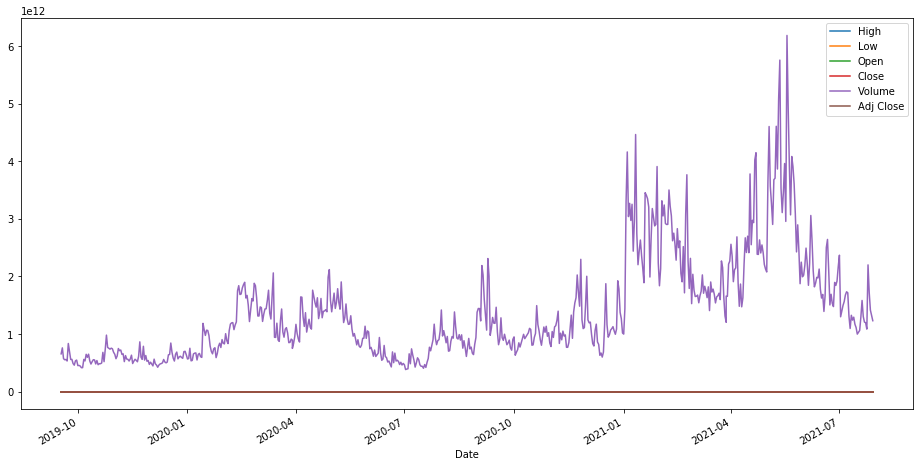

In [52]:
ETH_df.plot()

In [53]:
ETH_df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [54]:
ETH_df.reset_index(inplace=True)
ETH_df.columns 

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [55]:
df2 = ETH_df[["Date", "Close"]]
new_names = {
    "Date": "ds", 
    "Close": "y",
}
df2.rename(columns=new_names, inplace=True)

C:\Users\Pratibha\anaconda3\lib\site-packages\pandas\core\frame.py:5042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df2.tail(5)

ds              y
672 2021-07-24  163145.921875
673 2021-07-25  165916.265625
674 2021-07-26  171231.734375
675 2021-07-27  170840.578125
676 2021-07-29  172034.484375

In [57]:
# plot the Close price
import plotly.graph_objects as go

x = df2["ds"]
y = df2["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of Ethereum Close Price",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

In [67]:
ETH_m = Prophet(
    
    )

ETH_m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future_ETH = ETH_m.make_future_dataframe(periods = 365)
future_ETH.tail()

ds
1035 2022-07-25
1036 2022-07-26
1037 2022-07-27
1038 2022-07-28
1039 2022-07-29

In [69]:
forecast_ETH = ETH_m.predict(future_ETH)
forecast_ETH[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
1035 2022-07-25  316885.934493  228681.323242  406463.219657
1036 2022-07-26  316943.404286  225483.483343  406906.889588
1037 2022-07-27  317520.210219  222978.073871  407850.103839
1038 2022-07-28  316525.195186  222378.695603  407373.267044
1039 2022-07-29  317000.422957  225116.154052  406417.373918

In [70]:
plot_plotly(ETH_m, forecast_ETH)


In [71]:
plot_components_plotly(ETH_m, forecast_ETH)

In [72]:
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')

forecast_ETH[forecast_ETH['ds'] == next_day]['yhat'].item()

194142.34158092792

In [73]:
ETH_cv = cross_validation(ETH_m, initial='310 days', period='180 days', horizon = '365 days')
#df2_cv<- cross_validation(ETH_m, initial = 100, period = 100, horizon = 100, units = 'days')
ETH_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-07-29 00:00:00 and 2020-07-29 00:00:00


ds          yhat    yhat_lower    yhat_upper             y  \
0 2020-07-30  19796.467905  16810.368994  22796.020184  25892.375000   
1 2020-07-31  20026.582861  17121.372835  22878.711217  28862.976562   
2 2020-08-01  19933.445486  17081.102298  22627.765013  27770.005859   
3 2020-08-02  19953.894869  16837.312317  22648.339967  29036.091797   
4 2020-08-03  20004.433831  17070.858937  22911.929855  29264.636719   

      cutoff  
0 2020-07-29  
1 2020-07-29  
2 2020-07-29  
3 2020-07-29  
4 2020-07-29

In [74]:
from fbprophet.diagnostics import performance_metrics
ETH_p = performance_metrics(ETH_cv)
ETH_p.head()

horizon           mse         rmse          mae      mape     mdape  \
0 36 days  8.693831e+07  9324.071533  9168.539579  0.303728  0.308918   
1 37 days  8.610316e+07  9279.179086  9073.198143  0.300201  0.308918   
2 38 days  8.440079e+07  9186.990271  8941.585505  0.296093  0.308918   
3 39 days  8.315776e+07  9119.087498  8837.291312  0.292631  0.308918   
4 40 days  8.112316e+07  9006.839887  8669.449709  0.287332  0.306026   

   coverage  
0  0.000000  
1  0.027778  
2  0.027778  
3  0.027778  
4  0.027778

C:\Users\Pratibha\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

C:\Users\Pratibha\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



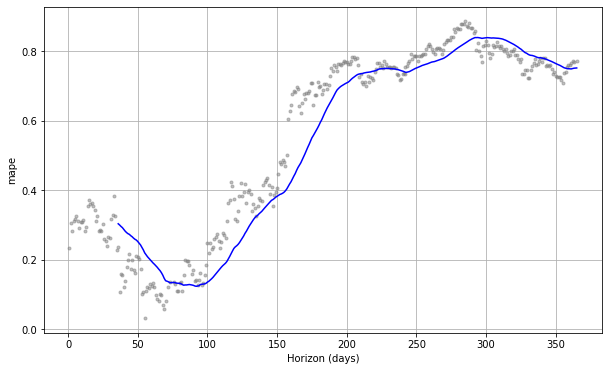

In [75]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(ETH_cv, metric='mape')